In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web

#### step1. 使用pandas_datareader得到 "AAPL" 這間公司股價的所有資料，不用設定資料時間

In [2]:
df = web.DataReader("AAPL", "yahoo")

#### step2. 取出最後300筆資料

In [3]:
data = df.tail(300)

#### step3. 從這300筆資料，取出收盤價close，並轉成numpy_array讓我們在後面使用

In [4]:
p = df['Close']

#### step4. 我們現在要做的，是用前一天的收盤價，預測第二天的收盤價（星期一預測星期二），請依照這個需求，把資料分成題目X(迴歸直線的x座標，表示所有的「前一天收盤價」)，跟答案Y(迴歸直線的y座標，表示所有的「第二天收盤價」) 

In [5]:
x = p[-300:]
y = p[-301:-1]

In [6]:
X = np.array(x)
Y = np.array(y)

In [7]:
X = X.reshape(300,1)
Y = Y.reshape(300,1)

#### step5. 請把題目X，答案Y再分成佔80%的訓練資料跟佔20%的測試資料

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=9487)

#### step6. 請實際的利用訓練資料和scikit learn跑線性回歸，畫圖，並在得到的迴歸直線上，加上訓練資料的資料點(plt.scatter...)，看看你回歸的結果跟實際結果差多少。

In [10]:
model = LinearRegression()

In [11]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_predict = model.predict(x_test)

Text(0, 0.5, 'Predicted Price')

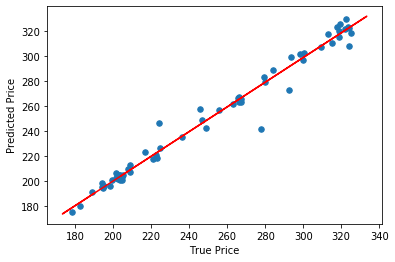

In [13]:
plt.scatter(y_test, y_predict, cmap="rainbow", s=30)
plt.plot(x_train, model.predict(x_train), 'r') 
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

由此可看出，雖然只有幾個點在線上，但是以整體來說，還是落在線的附近，代表落差並不大。